<a href="https://colab.research.google.com/github/Mwendwa-Sharon/Cryptojacking-Detection/blob/main/CryptojackingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [158]:
# Loading the training data
train_df = pd.read_csv('drive/MyDrive/UmojaHack/Train.csv')
train_df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [120]:
# Loading the testing data
test_df = pd.read_csv('drive/MyDrive/UmojaHack/Test.csv')
test_df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [93]:
# Checking size and shape of the data

train_df.shape, test_df.shape

((8908, 16), (3818, 15))

## DATA PRE-PROCESSING

In [94]:
1. # Check for duplicates
train_df.duplicated().any(), test_df.duplicated().any()

(False, False)

In [95]:
2. # Check for missing values
train_df.isnull().sum().any(), test_df.isnull().sum().any()

(False, False)

There are no missing and duplicate values in the data.

In [96]:
# checking the datatypes of all the columns

train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

(None, None)

In [97]:
train_df['Label'].unique()

array([1, 0])

In [98]:
# # The column label has the wrong datatype. It is supposed to be categorical column.

# train_df['Label'] = train_df['Label'].astype('category')

# #checking if the datatype has changed
# train_df['Label'].dtype

## DATA ANALYSIS

In [99]:
train_df.describe() 

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800,1.000000


In [100]:
test_df.describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
count,3818.000000,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,35.454530,1.060442e+05,29.839911,0.470127,5.296448,0.828603,488.208150,1.268135e+04,3.967014,10.028086,1.003517,0.004651,2716.040535,28.501778
std,63.011557,4.545514e+05,5.644617,1.448820,14.876031,7.904918,1272.047984,5.165837e+04,12.000389,36.156194,11.028148,0.093827,4687.093183,3.947550
min,0.000000,0.000000e+00,1.000000,0.000000,0.044437,0.000000,1.194623,1.553716e+00,0.022123,0.022123,0.000000,0.000000,28.378620,19.201416
25%,2.299285,9.115071e+02,27.000000,0.000000,0.764662,0.000000,32.434994,2.717931e+01,0.377905,0.311112,0.000000,0.000000,358.590744,25.259288
50%,13.334305,5.191336e+03,28.000000,0.034733,1.733196,0.000000,64.647184,8.048330e+01,0.689106,0.622076,0.022222,0.000000,689.966068,28.677677
75%,37.458978,4.016868e+04,30.000000,0.485925,6.006380,0.022228,209.972965,5.046758e+02,1.533270,1.667070,0.088889,0.000000,1394.976327,31.063223
max,1024.316376,4.195586e+06,49.000000,14.900905,478.650632,317.548146,14825.920750,1.034951e+06,158.621612,686.529814,358.705681,3.910726,36580.746640,39.513024


In [101]:
train_df['Label'].value_counts()

0    6504
1    2404
Name: Label, dtype: int64

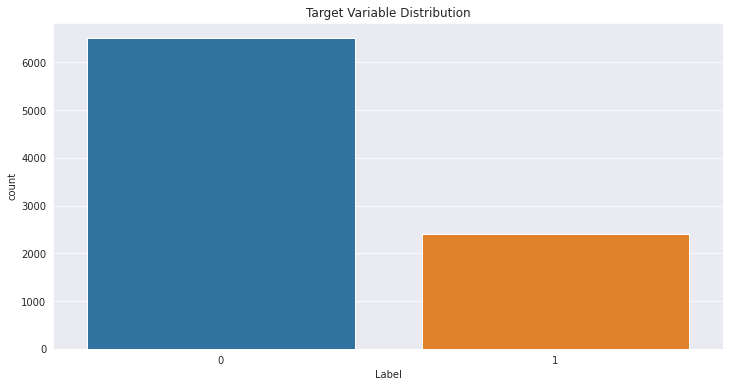

In [102]:
# Plotting a countplot to show distribution of the target variable
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train_df)
plt.title('Target Variable Distribution')
plt.show()

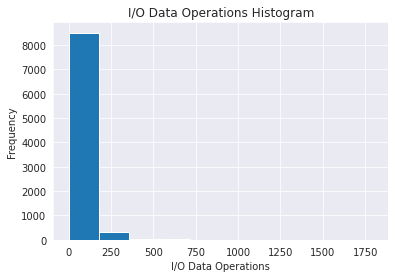

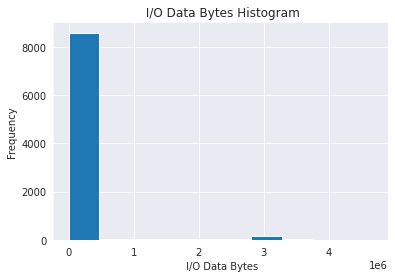

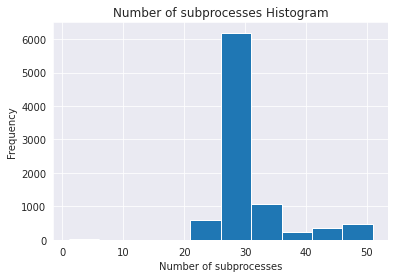

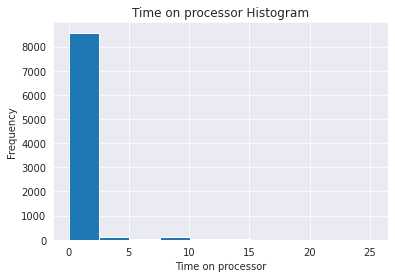

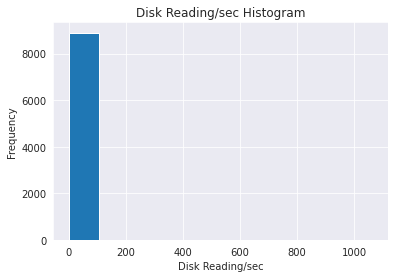

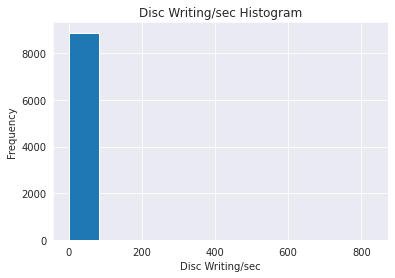

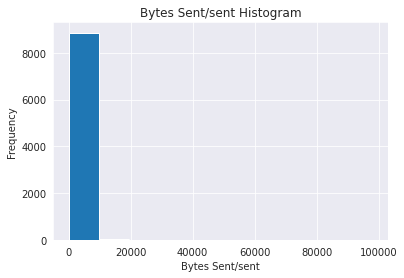

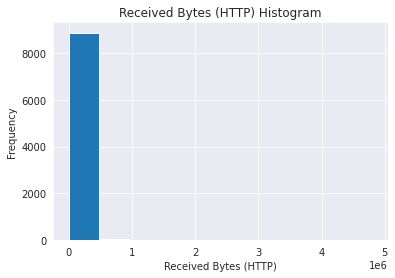

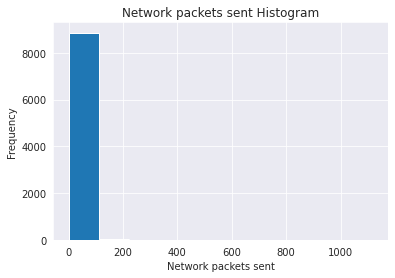

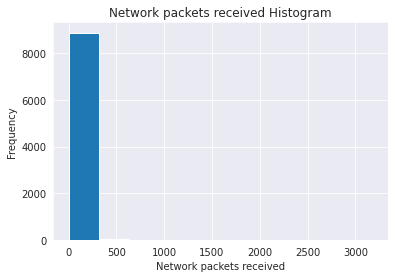

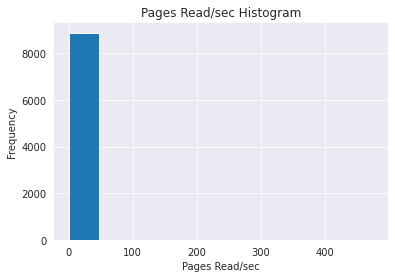

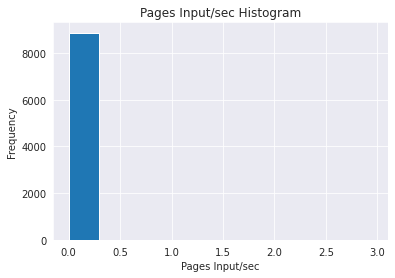

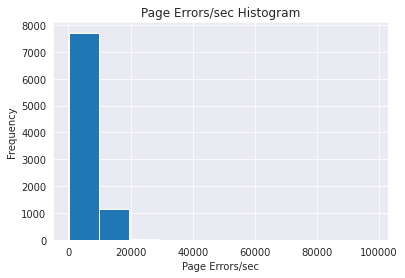

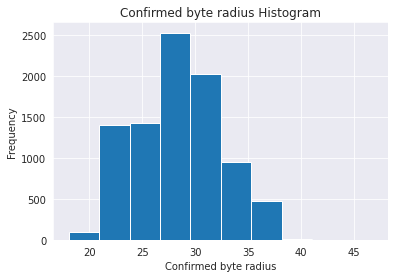

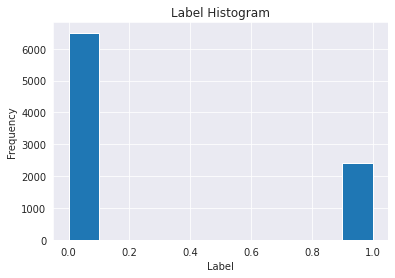

In [103]:
# Defining a funtion for plotting a histogram to understand the distribution of different variables

def plot_histograms(dataframe):
    # Get the column names of the dataframe
    numeric_columns = dataframe.select_dtypes(include=[float, int]).columns
    
    # Loop through each column and plot a histogram
    for column_name in numeric_columns:
        plt.hist(dataframe[column_name], bins=10)
        plt.title(column_name + ' Histogram')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(train_df)

- According to the descriptive statistics, there are many outliers which need to be taken care. 

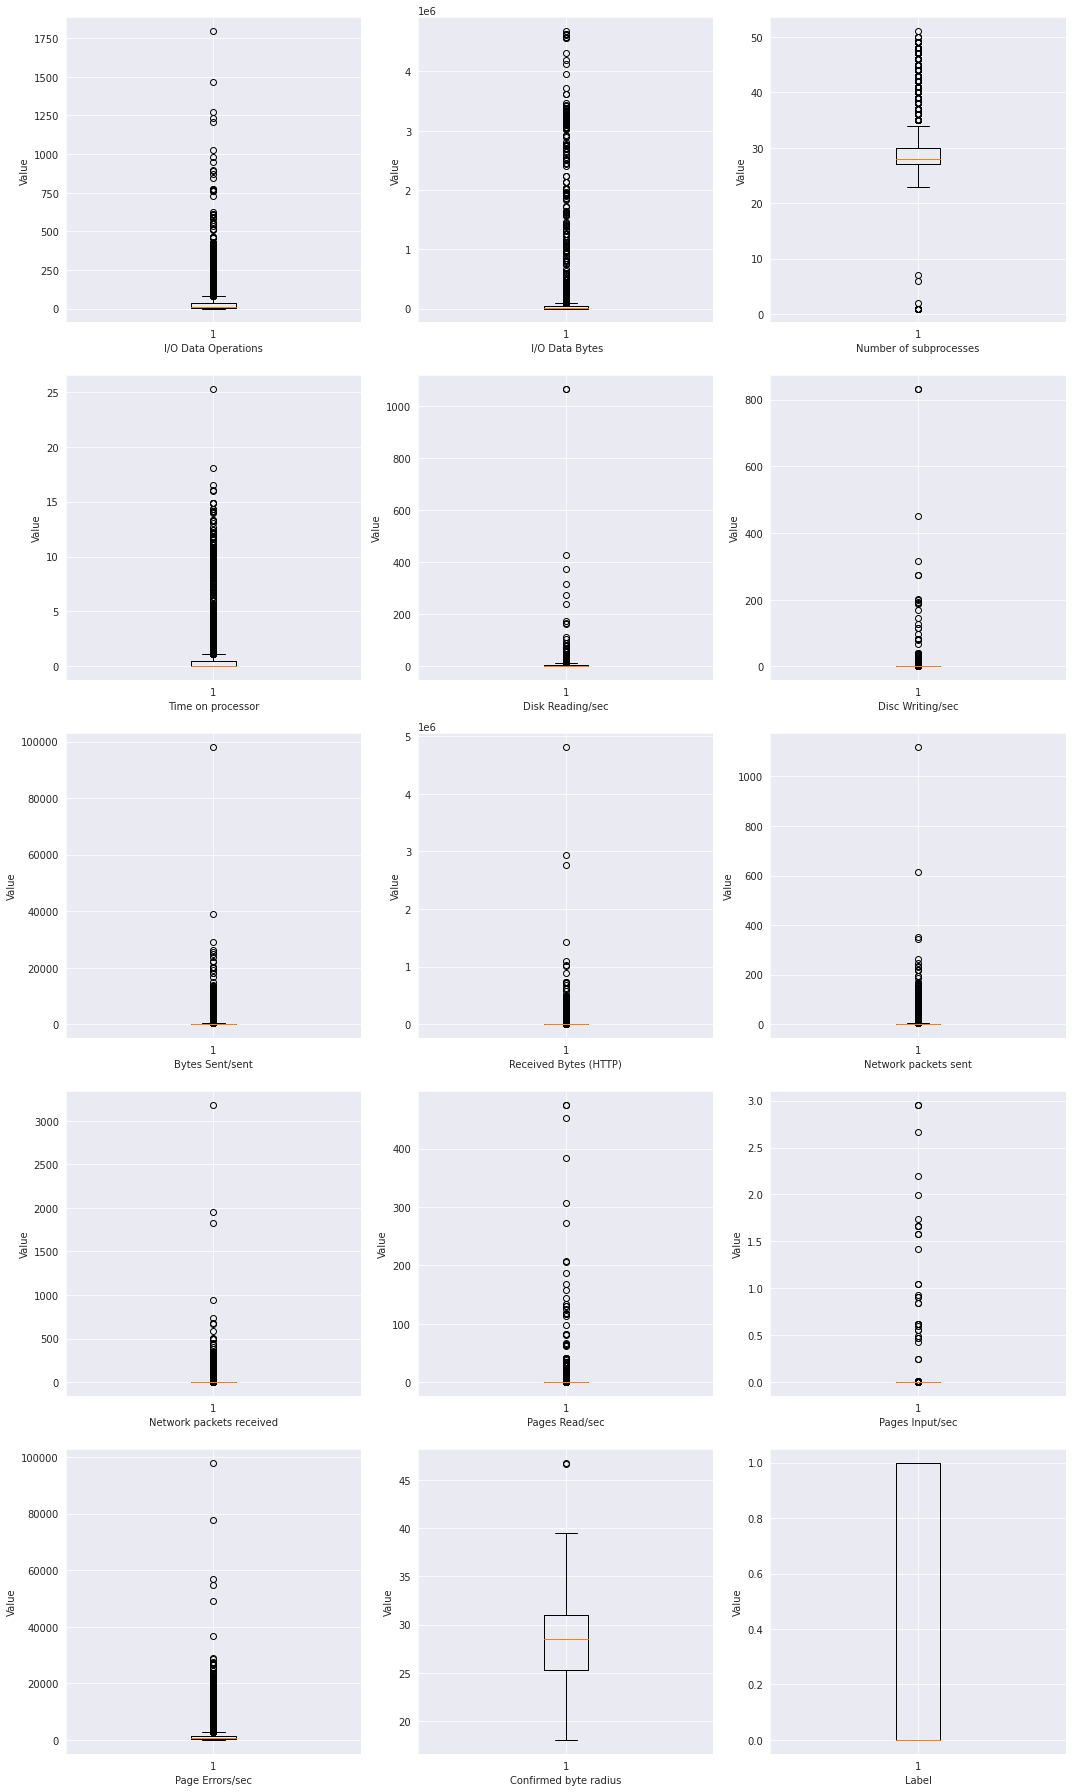

In [104]:
import math
def plot_boxplots(dataframe):
    # Get the column names of the dataframe
    numeric_columns = dataframe.select_dtypes(include=[float, int]).columns
    
    # Calculate the number of rows and columns for the subplots
    num_plots = len(numeric_columns)
    num_cols = min(num_plots, 3)
    num_rows = math.ceil(num_plots / num_cols)
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axs = axs.ravel()
    
    # Loop through each column and plot a boxplot in a different subplot
    for i, column_name in enumerate(numeric_columns):
        axs[i].boxplot(dataframe[column_name])
        #axs[i].set_title(column_name + ' Boxplot')
        axs[i].set_xlabel(column_name)
        axs[i].set_ylabel('Value')
    
    # Hide any unused subplots
    for j in range(i+1, num_rows*num_cols):
        axs[j].axis('off')
    
    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()
plot_boxplots(train_df)

All the columns have outliers that we need to take care of.

## MODELING

In [105]:
# Normalizing the data
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [106]:
# Scaling the features for classification algorithms

features = train_df.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

## FEATURE SELECTION

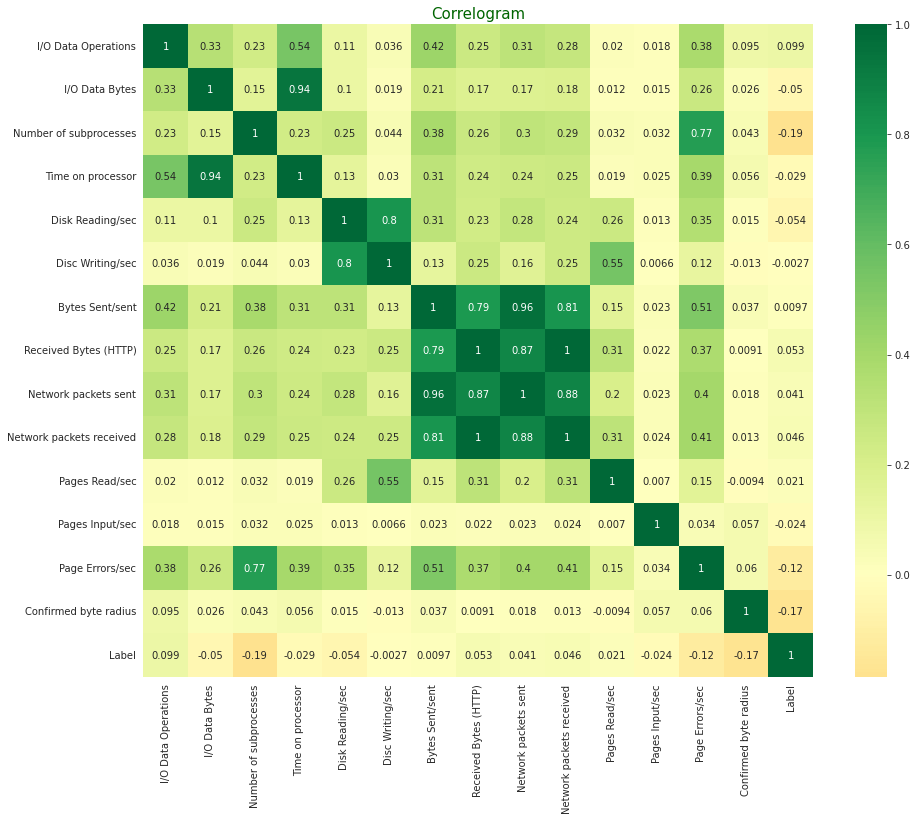

In [107]:
# Plotting a heatmap to show correlations between variables

corr = train_df.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
SEED = 1221
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train_df[features], 
                                                    train_df[target].to_frame(),
                                                    stratify=train_df[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [109]:
from sklearn.linear_model import LogisticRegression
#fit logistic regression model on rrain data
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

LogisticRegression()

In [110]:
#make predictions on validation set
preds = model.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, preds)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 76.69%


### IMPROVING THE ACCURACY OF THE MODEL

### 1. Removing Outliers

In [ ]:
# checking for skewness so as to know the best outlier detection and removal method.

from scipy.stats import skew

# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the skewness for each numeric column in the DataFrame
skewness = train_df[numeric_cols].apply(lambda x: skew(x.dropna()))

# Print the skewness for each column
print(skewness)


In [136]:
# Using the interquartile range method to detect and remove outliers

# defining a function to detect the percentage of outliers in the dataset
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')

#callig the function 
detect_outliers(train_df)

,Outlier_percentage
Label,0.000000
Confirmed byte radius,0.022452
Pages Input/sec,0.527616
Time on processor,6.623260
I/O Data Operations,11.551414
Number of subprocesses,12.494387
Disk Reading/sec,13.313875
I/O Data Bytes,16.827571
Network packets sent,17.332735
Page Errors/sec,18.724742


In [113]:
# Looping through the columns to removing outliers
for column in train_df.columns:
    if train_df[column].dtype != object:
        q1 = np.quantile(train_df[column], 0.25)
        q3 = np.quantile(train_df[column], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        train_df = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]


In [114]:
# Calling the detect_outliers function to see if the outliers have been removed
detect_outliers(train_df)

,Outlier_percentage
Number of subprocesses,0.000000
Disc Writing/sec,0.000000
Pages Read/sec,0.000000
Pages Input/sec,0.000000
Confirmed byte radius,0.000000
Label,0.000000
Network packets sent,0.261666
Network packets received,0.305277
Bytes Sent/sent,2.224160
Disk Reading/sec,3.009158


In [159]:
# Using Z-score to detect and remove outliers

from scipy import stats

# defining a function to remove outliers using z-score
def remove_outliers_zscore(data, threshold=1):
    z_scores = stats.zscore(data.select_dtypes(include=np.number))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return data[filtered_entries]
    
# calling the function with the data frame and a threshold of 1
train_df = remove_outliers_zscore(train_df, threshold=1)


In [134]:
detect_outliers(train_df)

,Outlier_percentage
Pages Input/sec,0.000000
Confirmed byte radius,0.000000
Label,0.000000
Number of subprocesses,2.200328
Page Errors/sec,2.266010
Pages Read/sec,4.072250
Network packets sent,5.550082
Disk Reading/sec,5.845649
Network packets received,6.798030
Received Bytes (HTTP),8.604269


In [156]:
#Using the  Local Outlier Factor (LOF) algorithm to identify and remove outliers. 

from sklearn.neighbors import LocalOutlierFactor

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_numeric = train_df[numeric_cols]

def remove_outliers_lof(df, neighbors=20, contamination=0.1):
    # create the LOF object
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination=contamination)
    
    # fit the algorithm to your data
    lof.fit(df)
    
    # predict the outlier status of each data point
    outliers = lof.fit_predict(df)
    
    # create a new data frame without the outliers
    df_clean = df.iloc[outliers == 1]
    
    # return the new data frame
    return df_clean



In [157]:
train_df = remove_outliers_lof(train_numeric, neighbors=10, contamination=0.05)
#calling the function to see whether the outliers have been removed.
detect_outliers(train_df)


,Outlier_percentage
Confirmed byte radius,0.000000
Label,0.000000
Pages Input/sec,0.531789
Time on processor,6.570551
I/O Data Operations,10.659419
Number of subprocesses,12.219333
Disk Reading/sec,13.720161
I/O Data Bytes,16.981801
Network packets sent,17.419050
Page Errors/sec,18.494446


After evaluating the 3 outlier detection and remove methods, Z-score was the best as the percentage of outliers in each column significantly dropped. 

2. Feature selection
3. Hyperparameter tuning
4. Cross-validation
5. Ensembling